<a href="https://colab.research.google.com/github/AyushSharma-IN/Deep-Learning-Lab/blob/main/DL_Lab_Exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment 2 : Neural Network from Scratch using Numpy on MNIST dataset

## Introduction

In this experiment, we will build a simple neural network from scratch using only NumPy to classify handwritten digits from the MNIST dataset.

**What we'll do:**
- Load and visualize MNIST data
- Preprocess the data (flatten and normalize)
- Build a 2-layer neural network with ReLU and Softmax activation
- Train the network using gradient descent
- Monitor training accuracy

**Network Architecture:**
- Input layer: 784 neurons (28×28 pixels flattened)
- Hidden layer: 10 neurons with ReLU activation
- Output layer: 10 neurons with Softmax activation (for 10 digit classes)

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data loaded successfully!

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Label range: 0 to 9

Visualizing first 5 training images:


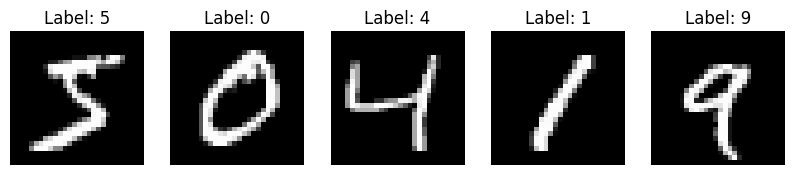

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Data loaded successfully!")

# Check the data shape
print(f"\nTraining data shape: {x_train.shape}")  # (60000, 28, 28)
print(f"Training labels shape: {y_train.shape}")  # (60000,)
print(f"Test data shape: {x_test.shape}")        # (10000, 28, 28)
print(f"Test labels shape: {y_test.shape}")       # (10000,)
print(f"\nLabel range: {y_train.min()} to {y_train.max()}")

# Visualize the first 5 images
print("\nVisualizing first 5 training images:")
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

## Data Preprocessing

Before training, we need to:
1. **Flatten** the images: Convert 28×28 images to 784-dimensional vectors
2. **Normalize** pixel values: Scale from 0-255 to 0-1 range for better training
3. **One-hot encode** labels: Convert digit labels (0-9) to binary vectors for classification

In [2]:
# Flatten and Normalize
print("Flattening and normalizing images...")
x_train = x_train.reshape(60000, 784).T / 255.0
x_test = x_test.reshape(10000, 784).T / 255.0

print(f"Training data shape after flattening: {x_train.shape}")  # (784, 60000)
print(f"Test data shape after flattening: {x_test.shape}")        # (784, 10000)
print(f"Pixel value range: {x_train.min():.2f} to {x_train.max():.2f}")

# One-hot encoding for labels
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

print("\nConverting labels to one-hot encoding...")
y_train_oh = one_hot(y_train)
print(f"One-hot encoded labels shape: {y_train_oh.shape}")  # (10, 60000)
print(f"Example label (first sample): {y_train[0]} -> one-hot: {y_train_oh[:, 0]}")

Flattening and normalizing images...
Training data shape after flattening: (784, 60000)
Test data shape after flattening: (784, 10000)
Pixel value range: 0.00 to 1.00

Converting labels to one-hot encoding...
One-hot encoded labels shape: (10, 60000)
Example label (first sample): 5 -> one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Neural Network Functions

We'll implement a 2-layer neural network:

**Functions:**
- `init_params()`: Initialize weights and biases randomly
- `ReLU()`: ReLU activation function for hidden layer
- `softmax()`: Softmax activation for output layer (gives probabilities)
- `forward_prop()`: Forward pass through the network
- `backward_prop()`: Backward pass to compute gradients
- `update_params()`: Update weights and biases using gradients

In [3]:
def init_params():
    W1 = np.random.randn(10, 784) * 0.01  # Weights for input to hidden layer
    b1 = np.zeros((10, 1))                 # Biases for hidden layer
    W2 = np.random.randn(10, 10) * 0.01    # Weights for hidden to output layer
    b2 = np.zeros((10, 1))                 # Biases for output layer
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp = np.exp(Z - np.max(Z))  # Subtract max for numerical stability
    return exp / np.sum(exp, axis=0)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1      # Linear transformation for hidden layer
    A1 = ReLU(Z1)            # Activation for hidden layer
    Z2 = W2.dot(A1) + b2     # Linear transformation for output layer
    A2 = softmax(Z2)         # Activation for output layer (probabilities)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.shape[1]  # Number of training examples

    # Gradients for output layer
    dZ2 = A2 - Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    # Gradients for hidden layer
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)  # Derivative of ReLU
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

# Test initialization
print("Initializing network parameters...")
W1, b1, W2, b2 = init_params()
print(f"W1 shape: {W1.shape}, b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}, b2 shape: {b2.shape}")
print("Network functions defined successfully!")

Initializing network parameters...
W1 shape: (10, 784), b1 shape: (10, 1)
W2 shape: (10, 10), b2 shape: (10, 1)
Network functions defined successfully!


## Training the Network

We'll train the network using gradient descent:
- **Iterations**: Number of training steps
- **Learning rate (alpha)**: Controls how big steps we take during optimization
- We'll print accuracy every 50 iterations to monitor progress

In [4]:
def gradient_descent(X, Y, iterations, alpha):
    print(f"\nStarting training...")
    print(f"Training samples: {X.shape[1]}")
    print(f"Learning rate: {alpha}")
    print(f"Total iterations: {iterations}\n")

    W1, b1, W2, b2 = init_params()

    for i in range(iterations):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)

        # Backward propagation
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)

        # Update parameters
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        # Print accuracy every 50 iterations
        if i % 50 == 0:
            predictions = np.argmax(A2, axis=0)
            labels = np.argmax(Y, axis=0)
            accuracy = np.sum(predictions == labels) / labels.size
            print(f"Iteration {i}: Training Accuracy = {accuracy:.4f} ({accuracy*100:.2f}%)")

    print("\nTraining completed!")
    return W1, b1, W2, b2

# Start training
W1, b1, W2, b2 = gradient_descent(x_train, y_train_oh, iterations=500, alpha=0.1)


Starting training...
Training samples: 60000
Learning rate: 0.1
Total iterations: 500

Iteration 0: Training Accuracy = 0.0853 (8.53%)
Iteration 50: Training Accuracy = 0.2683 (26.83%)
Iteration 100: Training Accuracy = 0.3408 (34.09%)
Iteration 150: Training Accuracy = 0.6497 (64.97%)
Iteration 200: Training Accuracy = 0.7842 (78.42%)
Iteration 250: Training Accuracy = 0.8260 (82.60%)
Iteration 300: Training Accuracy = 0.8514 (85.14%)
Iteration 350: Training Accuracy = 0.8680 (86.80%)
Iteration 400: Training Accuracy = 0.8773 (87.73%)
Iteration 450: Training Accuracy = 0.8830 (88.30%)

Training completed!


## Testing the Model

Let's evaluate the trained model on the test set to see how well it generalizes to new data.

Evaluating on test set...

Test Accuracy: 0.8892 (88.92%)

Example predictions on test set:


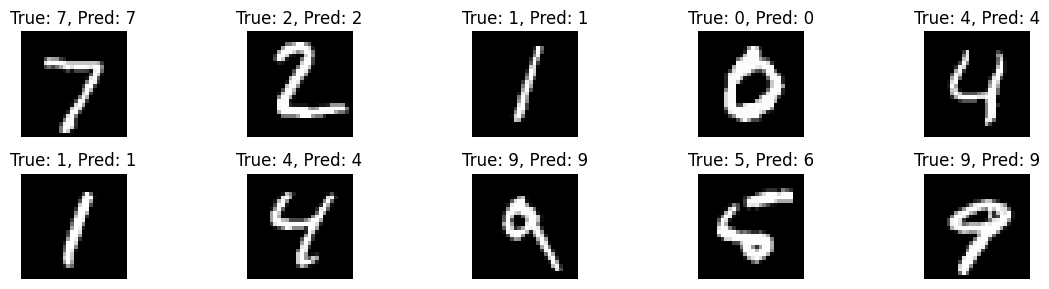

In [5]:
# Test the model on test data
print("Evaluating on test set...")
Z1_test, A1_test, Z2_test, A2_test = forward_prop(W1, b1, W2, b2, x_test)

# Convert predictions to class labels
predictions_test = np.argmax(A2_test, axis=0)

# Calculate test accuracy
test_accuracy = np.sum(predictions_test == y_test) / y_test.size
print(f"\nTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Show some example predictions
print("\nExample predictions on test set:")
plt.figure(figsize=(12, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[:, i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {predictions_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()